Будем использовать язык программирования `Python`  
А так же библиотеки:  
- iPython - продвинутая интерактивная консоль Python
- Jupyter Notebook - интерактивная среда в стиле `Literate programming`, по сути веб оболочка, позволяющая объединить код, текст и диаграммы, и распространять их для других пользователей
- Numpy - модуль вычислительных алгоритмов
- Scipy - модуль научных и инженерных алгоритмов (оптимизация)
- Sympy - модуль символьных вычислений
- Pands - обработка и анализ данных (числовые таблицы, временные ряды)

In [1]:
# Загружаем необходимые библиотеки
import sympy as sy
import numpy as np
from scipy.optimize import bisect, newton, brentq, fsolve, root as froot
import pandas as pd

In [2]:
sy.init_session() # удобно при работе с sympy
# библиотека визуализации будет отображать графики в документе а не в отдельном окне
%matplotlib inline 

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Численное решение нелинейных уравнений

Частая возникает задача: если дана функция $f(x)$, определить значения $x$ при которых $ f(x) = 0 $  
Эти значения $x$ известны как корни уравнения $ f(x) = 0 $

Приближенное нахождение корней обычно складывается из: 
1. Установление промежутков в которых содержится корень
2. Итерационное уточнение корней до заданной степени точности

Действительные корни уравнения $ f(х) = 0 $ приближенно можно определить как абсциссы точек пересечения графика функции $y=f(x)$ с осью $Ох$  
На практике часто бывает выгодно уравнение $ f(х) = 0 $ заменить равносильным ему уравнением  $ F_1(x) =  F_2(x) $
где функции $F_1(x)$ и $F_2(x)$ — более простые, чем функция $f(x)$.  
Тогда, построив графики функций $y=F_1(x)$ и $y=F_2(x)$ искомые корни получим как абсциссы точек пересечения этих графиков.

### Графическое решение
Осуществим локализацию корней следующего уравнения $$ f(x) = sin(x) - log(x) $$

Введем две функции $ F_1(x) = sin(x)$, $ F_2(x) = log(x) $

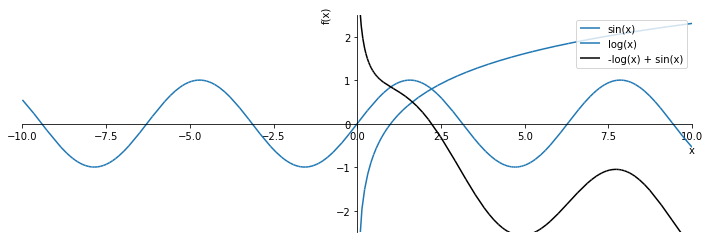

In [3]:
f1 = sy.sin(x)
f2 = sy.log(x)
f3 = f1 - f2
plt.rcParams['figure.figsize'] = 12, 4
p = sy.plot(f1, f2, f3, ylim=(-2.5, 2.5), legend = True, show=False)
p[2].line_color = 'black'
p.show()

По графику видно что абсцисса $x_0$ точки пересечения функций $F_1(x)$ и $F_2(x)$ и абсцисса $x_0$ точки пересечения оси $Ox$ и $f(x)$ совпадауют и являются единственным решение уравнения. По графику видно что $x_0$ ~ 2.3  
Подтвердим предположение используя численный метод нахождения корня:

In [4]:
func3 = lambdify([x], f3)
# Найдем корни используя метод оптимизации 
root = fsolve(func3, 3)
print("Корень уравнения = ", root)

Корень уравнения =  [ 2.21910715]


Построим графики функций и визуально проверим правильность нахождения корня

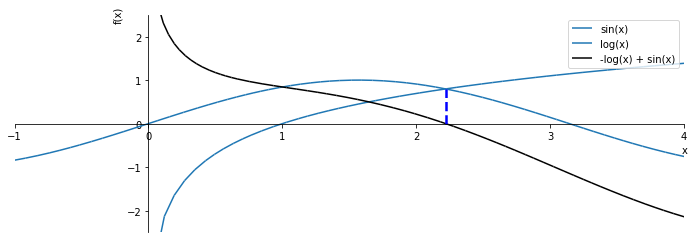

In [5]:
p = sy.plot(f1, f2, f3, (x, -1, 4), ylim=(-2.5, 2.5), show=False)
p[2].line_color = 'black'
p.legend = True
p._backend = p.backend(p)
fig = p._backend.fig
ax = p._backend.ax
t = root
ax.plot([t, t], [0, np.sin(t)], color='blue', linewidth=2.5, linestyle="--")
p._backend.show()

Графически решим $xlog(x) = 1$  
$log(x) = 1/x$ значит можно построить $y=log(x)$ и $y=1/x$    

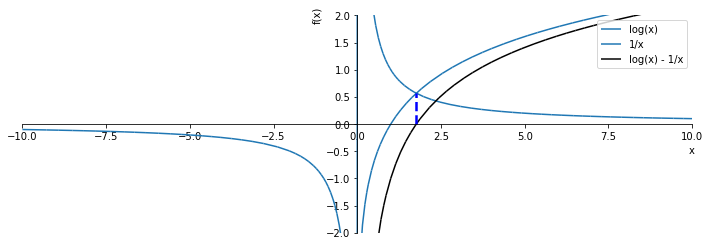

Корень уравнения =  [ 1.76322283]


In [6]:
f1 = sy.log(x)
f2 = 1/x
f3 = f1 - f2
func3 = lambdify([x], f3)
root = fsolve(func3, 3)

plt.rcParams['figure.figsize'] = 12, 4
p = sy.plot(f1, f2, f3, ylim=(-2, 2), legend = True, show=False)
p[2].line_color = 'black'
p._backend = p.backend(p)
fig = p._backend.fig
ax = p._backend.ax
t = root
ax.plot([t, t], [0, np.log(t)], color='blue', linewidth=2.5, linestyle="--")
p._backend.show()
print("Корень уравнения = ", root)

Графически решим $f(x) = -x^2 - 0.25e^x + 1 $  
$0.25e^x = 1-x^2$ значит можно построить $y=0.25e^x$ и $y=1-x^2$   

In [7]:
f1 = 1 - x**2
f2 = 0.25 * sy.exp(x)
f3 = f1-f2
func3 = lambdify([x], f3)
root = fsolve(func3, -1)
root2 = fsolve(func3, 2)

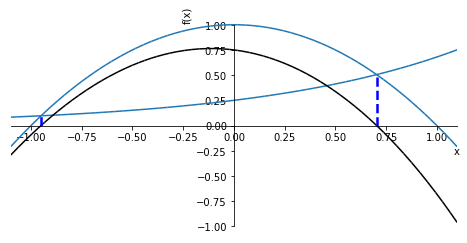

Корени уравнения =  [-0.95045169] [ 0.70343957]


In [8]:
plt.rcParams['figure.figsize'] = 8, 4
p = sy.plot(f1, f2, f3, (x, -1.1, 1.1), show=False)
p[2].line_color = 'black'
p._backend = p.backend(p)
fig = p._backend.fig
ax = p._backend.ax
t = root
ax.plot([t, t], [0, 0.25*np.exp(t)], color='blue', linewidth=2.5, linestyle="--")
t = root2
ax.plot([t, t], [0, 0.25*np.exp(t)], color='blue', linewidth=2.5, linestyle="--")
p._backend.show()
print("Корени уравнения = ", root, root2)

In [9]:
f3 = x**3-1.1*x**2-2.2*x+1.8
f3

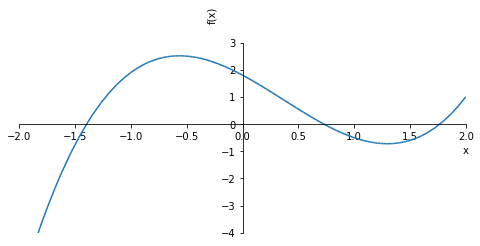

In [10]:
plot(f3, (x, -2,2), ylim=(-4, 4))
func3 = sy.lambdify([x], f3)

In [11]:
fsolve(func3, [-1, 1, 2])
#root(func3, [-2, 1, 2], method='hybr')

array([-1.39703453,  0.72856351,  1.76847101])

## Итерационное уточнение

In [12]:
def fn_iteration(f, x0, n_iterations = 100):
    """Functional iteration"""
    def g(x): 
        return x - f(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])
    
    return iters
def f1(x):
    return x - np.cos(x)

result1 = fn_iteration(f1, 0.0)

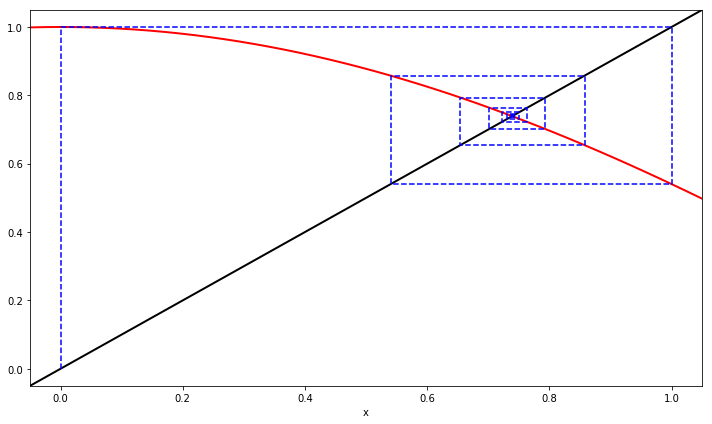

In [13]:
x0_n = np.linspace(-0.1, 1.1)
g1x = x0_n - f1(x0_n)
plot_results = np.empty((2*result1.size,))
plot_results[0::2] = result1
plot_results[1::2] = result1 - f1(result1)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x0_n, x0_n, 'k-', linewidth = 2)
ax.plot(x0_n, g1x, 'r-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results, 'b--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.05)
ax.set_ybound(-0.05, 1.05)
fig.tight_layout()
plt.show()

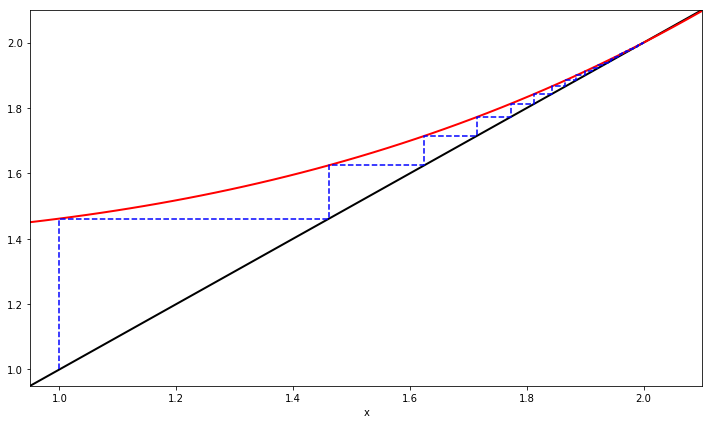

In [14]:
def f2(x):
    return -(x**3 - 13.0*x + 18.0) / 13.0

result2 = fn_iteration(f2, 1.0)
x0_n = np.linspace(0.9, 2.1)
g2x = x0_n - f2(x0_n)
plot_results = np.empty((2*result2.size,))
plot_results[0::2] = result2
plot_results[1::2] = result2 - f2(result2)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x0_n, x0_n, 'k-', linewidth = 2)
ax.plot(x0_n, g2x, 'r-', linewidth = 2)
ax.plot(np.repeat(result2,2), plot_results, 'b--')
ax.set_xlabel('x')
ax.set_xbound(0.95, 2.1)
ax.set_ybound(0.95, 2.1)
fig.tight_layout()
plt.show()

## Метод бисекции

Также называется метод деления отрезка пополам

In [15]:
def bisect_my(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:  
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

def half_divide_method(f, lower, upper, tol=10e-5):
    import math
    a, b = lower, upper    
    x = (a + b) / 2
    while np.fabs(f(x)) >= tol:
        x = (a + b) / 2
        a, b = (a, x) if f(a) * f(x) < 0 else (x, b)
    return (a + b) / 2

Осуществим локализацию корней следующего уравнения

In [16]:
# Функция
f = sy.sin(4 * (x-0.25)) - sy.exp(x) + x**10 - 1
func = sy.lambdify([x], f)
f

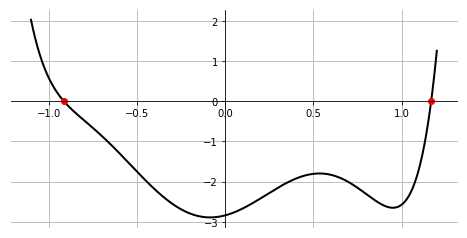

Корни уравнения 
[ 1.1678772  -0.91313759]


In [17]:
f_vect = np.vectorize(func)

# Находим корень на промежутке
root = bisect_my(func, 0, 2, 10e-5)
root2 = fsolve(func, -1)

# Построим график функции на промежутке, используя количество точек
grid = np.linspace(-1.1, 1.2, 1000)

fig, ax = plt.subplots()
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.grid()
ax.plot(grid, f_vect(grid), 'k-', linewidth=2)
roots = np.array([root, root2])
ax.plot(roots, f_vect(roots), 'ro', label="Roots")
plt.show()

print("Корни уравнения ")
print(roots)

### Метод простой итерации

Используем инкрементный поиск с $∆x = 0.2$ для нахождения минимального положительного решения $f(x) = x^3-10x^2 + 5$

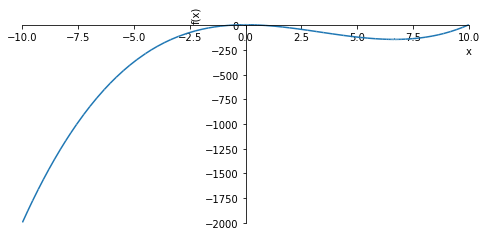

,x,F(x)
0,-2.5,-73.125
1,-2.1,-48.361
2,-1.7,-28.813
3,-1.3,-14.097
4,-0.9,-3.829
5,-0.5,2.375
6,-0.1,4.899
7,0.3,4.127
8,0.7,0.443
9,1.1,-5.769


In [18]:
''' x1,x2 = rootsearch(f,a,b,dx)
    Search the interval (a,b) in increments ds for
    the bounds (x1,x2) of the smallest root of f(x).
    Returns x1 = x2 = None if no root were detected.
'''
def rootsearch(f, a, b, dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while f1*f2 > 0.0:
        if x1 > 0.0:
            if x1 >= 0.0: return None, None
            x1 = x2; f1 = f2
            x2 = x1 + dx; f2 = f(x2)
        else:
            return x1,x2
        
f1 = x**3-10*x**2 + 5
plot(f1)
func1 = sy.lambdify([x], f1)

sample = np.arange(-2.5, 3, 0.4)
#plt.plot()
#rootsearch(func1, 0, 10, 0.2)
sample2 = np.array([[x for x in sample], [func1(x) for x in sample]])

df = pd.DataFrame(sample2)
df = df.transpose()
df.columns = 'x', 'F(x)'

'''
    sign_change_indcies( a )
    Search for sign change
    Returns array of indeces after which a zero crossing occurs
'''
def sign_change_indecies(a, after=True):
    asigns = np.sign(a)
    indeces = numpy.where(numpy.diff(asign))[0]
    return indeces if after else np.array([x+1 for x in indeces])

def sign_change_array(a):
    return (np.diff(np.sign(a)) != 0)

def highlight_vals(data, color='green'):
    print(data.name)
    attr = 'background-color: {}'.format(color)
    a = sign_change_array(data)
    return np.where(a, attr, '')
            
#df.style.apply(highlight_vals, axis=0)
#sign_change_indecies(df.values[0:, 1])

#highlight_vals(df)
#a = sign_change_array(df.values[0:, 1])
#a.shape

# import seaborn as sns
# cm = sns.light_palette("green", as_cmap=True)
# s = df.style.background_gradient(cmap=cm)
# s

# http://pandas.pydata.org/pandas-docs/stable/style.html

df.style.bar(subset=['F(x)'], align='mid', color=['#d65f5f', '#5fba7d'])


In [19]:
### Метод Ньютона-Рафсона

def newtons_method(a, b, f, f1, e=10e-5):
    x0 = (a + b) / 2
    x1 = x0 - (f(x0) / f1(x0))
    while True:
        if np.fabs(x1 - x0) < e: return x1
        x0 = x1
        x1 = x0 - (f(x0) / f1(x0))



In [20]:
##Вычисление алгебраического полинома 
### Нахождение корней полинома методом Ньютона-Рафсона
### Метод Бирге-Виета
### схемой Горнера

## Решение СЛАУ
### Метод Гаусса
### Метод Гаусса-Зейделя



# References:

- Серов В.А. Вычислительные методы и алгоритмы Учебное пособие Москва, 2013
- lectures.quantecon.org/py/learning_python.html 
- github.com/IanHawke/maths-with-python 
- github.com/IanHawke/NumericalMethods 
- github.com/mandli/intro-numerical-methods 
- www.scipy-lectures.org/intro/scipy.html
- www.scipy-lectures.org/intro/matplotlib/index.html 
- www.scipy-lectures.org/packages/sympy.html 
- docs.sympy.org/latest/tutorial/index.html#tutorial 
- docs.scipy.org/doc/scipy/reference/optimize.html 


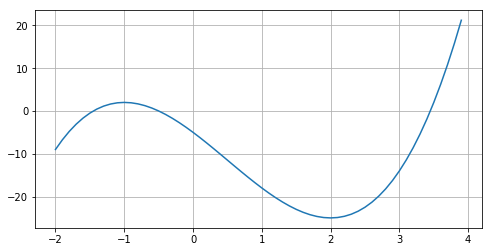

3.44948974280415


In [21]:
f0 = 4 * ( 1 - x ** 2) - sy.exp(x)
f1 = 2 * x ** 3 - 3 * x ** 2 - 12 * x - 5
f2 = sy.diff(f1)
func0 = sy.lambdify([x], f0)
func1 = sy.lambdify([x], f1) 
func2 = sy.lambdify([x], f2)

x0_n = numpy.arange(-2.0, 4.0, 0.1)

a1, b1 = 0, 10
plt.plot([x for x in x0_n], [func1(x) for x in x0_n])
plt.grid(True)
plt.show()
# print (fsolve(func1, b1))
# print (bisect_my(func1, a1, b1, 10e-5))
# print (half_divide_method(func1, a1, b1))
print (newtons_method(a1, b1, func1, func2))